                           Feature  Importance_Mean  Importance_STD
13                   avg_sentiment         0.522368        0.024104
31                 taste_sentiment         0.140195        0.007169
32               service_sentiment         0.098034        0.009523
11                         Alcohol         0.028613        0.002858
12                      text_count         0.015653        0.002561
1                    checkin_count         0.010426        0.002191
0                            stars         0.008393        0.002130
8          RestaurantsReservations         0.004980        0.002237
30  local_cuisine_preference_score         0.004414        0.002290
19                       Fast Food         0.003487        0.002399
5           RestaurantsPriceRange2         0.002797        0.001339
6                   OutdoorSeating         0.002502        0.001527
2       BusinessAcceptsCreditCards         0.001847        0.000855
4               RestaurantsTakeOut         0.001

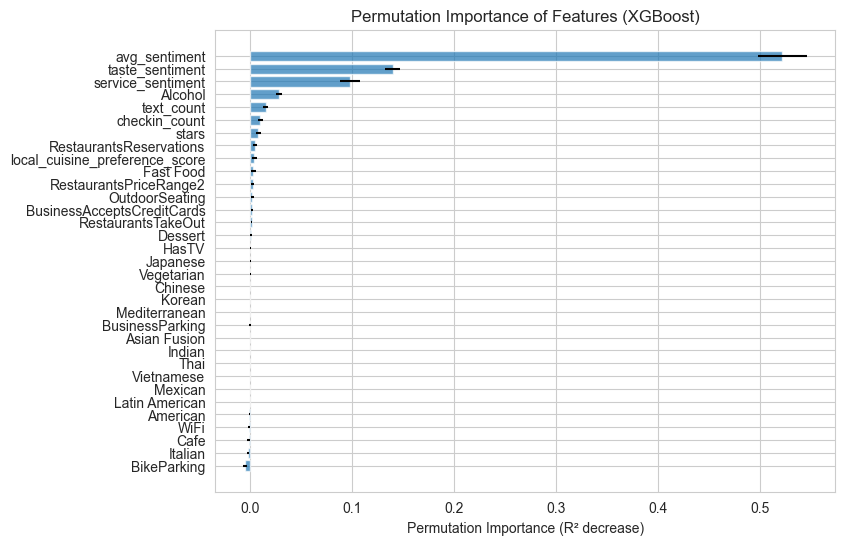

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df = pd.read_csv("/Users/emmali/PyCharmMiscProject/final_real.csv")

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

drop_cols = [col for col in X.columns if "id" in col.lower()]
X = X.drop(columns=drop_cols)

X = X.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)


result = permutation_importance(
    model, X_test, y_test,
    n_repeats=10, random_state=42, scoring="r2"
)

perm_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance_Mean": result.importances_mean,
    "Importance_STD": result.importances_std
}).sort_values(by="Importance_Mean", ascending=False)

print(perm_importance)

plt.figure(figsize=(8,6))
plt.barh(
    perm_importance["Feature"],
    perm_importance["Importance_Mean"],
    xerr=perm_importance["Importance_STD"],
    align="center", alpha=0.7
)
plt.gca().invert_yaxis()
plt.xlabel("Permutation Importance (R² decrease)")
plt.title("Permutation Importance of Features (XGBoost)")
plt.show()
